<a href="https://colab.research.google.com/github/nadirboulahchiche/traffic-sign-classification/blob/main/Traffic_sign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic sign classification using transfer learning :**
this notebook will cover how to classify traffic signs using transfer learning with vgg16 and resnet50 respectively.

the dataset was downloaded from this link : https://drive.google.com/drive/folders/1ml7xPJ-gOtCZLbAJ8beXy-U6_KRtiY6C?usp=sharing

you can also download it from the original source : https://www.kaggle.com/ahemateja19bec1025/traffic-sign-dataset-classification

# **1. importing all packages :**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import glob
import os

from tensorflow.keras.layers import Dense , Flatten , Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping

# **2. Analysing and visualising out data :**

In [ ]:
#path to the csv file containing all labels for traffic signs since folder contains numbers instead of class names
path = '/content/drive/MyDrive/traffic_sign_dataset/labels.csv'
df = pd.read_csv(path)

In [ ]:
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right




*   we see that the dataset contains 58 different class (traffic signs)



In [ ]:
#path to the folder containing our dataset
dataset = '/content/drive/MyDrive/traffic_sign_dataset/traffic_Data/DATA'



*   we try to diplay how many images each class contains



In [ ]:
data = []
entry = []
for filename in os.listdir(dataset):
  entry.append(df['Name'][int(filename)])
  entry.append(int(filename))
  data.append(entry[:2])
  entry.clear()

#making a dataframe so it's easier to display using seaborn
display_data = pd.DataFrame(data,columns=['Name' , 'num_images'])
#display_data

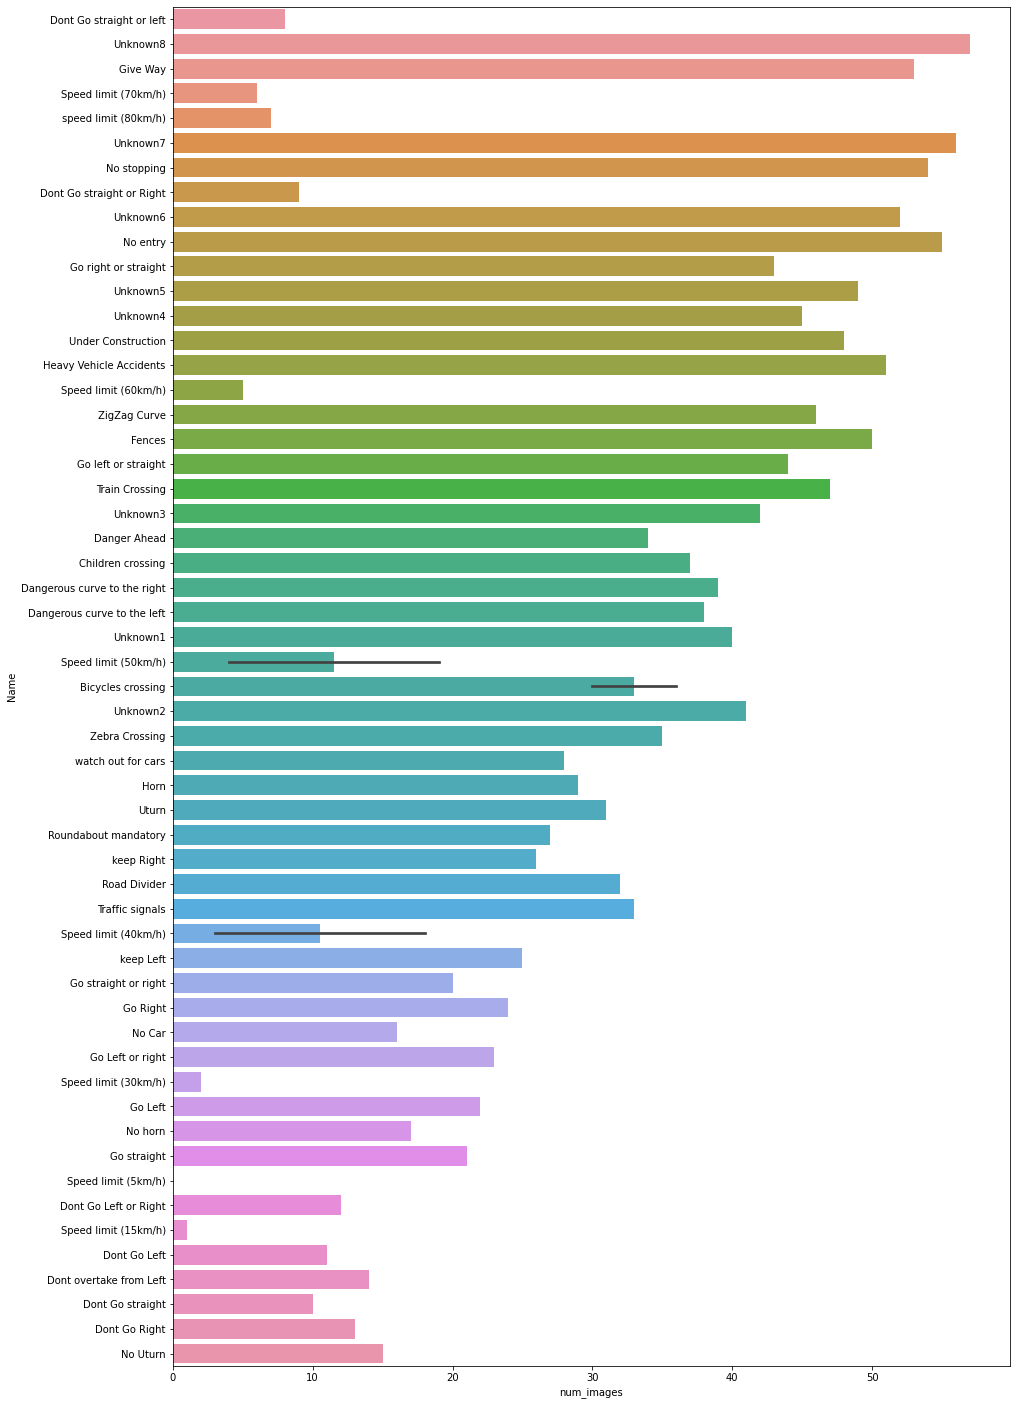

In [ ]:
plt.figure(figsize=(15,25))
ax = sns.barplot(x='num_images',y='Name' , data=display_data)



*   we strat preparing our data



In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,
                                                    subset='training',
                                                    color_mode='rgb',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,
                                                    subset='validation',
                                                    color_mode='rgb',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)

Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [ ]:
class_numbers = train_ds.class_names
#print(class_numbers)



*   assigning each class to it's proper name



In [ ]:
class_names = []
for i in class_numbers:
 class_names.append(df['Name'][int(i)])

#class_names



*   Visualising if each class has it's own name



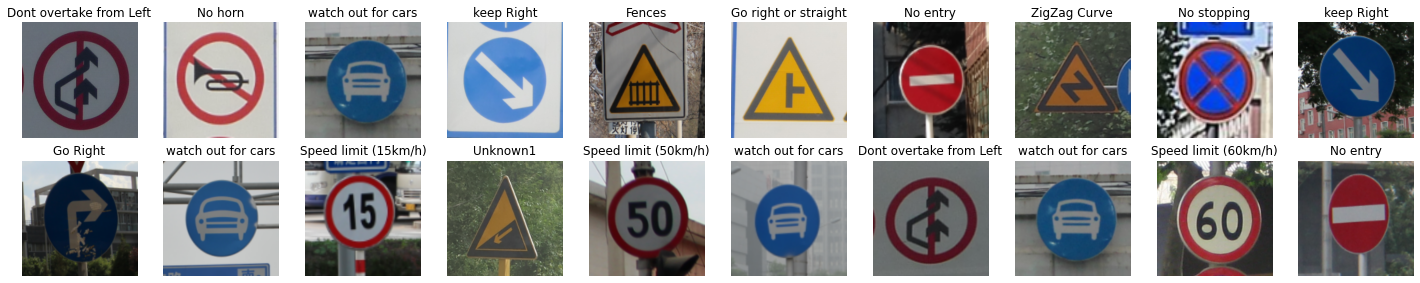

In [ ]:
plt.figure(figsize=(25, 25))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

# **3. Training model using vgg16 :**

In [ ]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=False,weights='imagenet')

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,  224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
   tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical")
  ]
)

In [ ]:
model_vgg = Sequential()
model_vgg.add(data_augmentation)
#model_vgg.add(Rescaling(1./255))
model_vgg.add(vgg)
model_vgg.add(Flatten())
model_vgg.add(Dense(512 , activation = 'relu'))
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(512 , activation = 'relu'))
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(len(df) , activation = 'softmax'))
model_vgg.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)              

In [ ]:
model_vgg.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam' , metrics=['accuracy'])

In [ ]:
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]
hist_vgg = model_vgg.fit(train_ds,validation_data=val_ds, epochs=50 , callbacks=mycallbacks )

Epoch 1/50
105/105 [==============================] - 45s 412ms/step - loss: 4.2773 - accuracy: 0.1286 - val_loss: 3.3960 - val_accuracy: 0.1823
Epoch 2/50
105/105 [==============================] - 43s 403ms/step - loss: 3.1992 - accuracy: 0.2026 - val_loss: 2.7495 - val_accuracy: 0.2590
Epoch 3/50
105/105 [==============================] - 43s 402ms/step - loss: 2.6317 - accuracy: 0.2797 - val_loss: 2.3340 - val_accuracy: 0.2734
Epoch 4/50
105/105 [==============================] - 43s 406ms/step - loss: 2.3411 - accuracy: 0.3210 - val_loss: 2.1724 - val_accuracy: 0.3765
Epoch 5/50
105/105 [==============================] - 43s 403ms/step - loss: 2.1599 - accuracy: 0.3606 - val_loss: 1.8951 - val_accuracy: 0.4353
Epoch 6/50
105/105 [==============================] - 43s 408ms/step - loss: 1.9603 - accuracy: 0.4047 - val_loss: 1.8149 - val_accuracy: 0.4149
Epoch 7/50
105/105 [==============================] - 43s 404ms/step - loss: 1.8719 - accuracy: 0.4140 - val_loss: 1.7089 - val_ac

# **4. training using resNet50 :**



In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [ ]:
model_resnet = Sequential()
model_resnet.add(data_augmentation)
#model_resnet.add(Rescaling(1./255))
model_resnet.add(resnet)
model_resnet.add(Flatten())
model_resnet.add(Dense(512 , activation = 'relu'))
model_resnet.add(Dropout(0.2))
model_resnet.add(Dense(512 , activation = 'relu'))
model_resnet.add(Dropout(0.2))
model_resnet.add(Dense(len(df) , activation = 'softmax'))
model_resnet.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 512)               51380736  
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)              

In [ ]:
model_resnet.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam' , metrics=['accuracy'])

In [ ]:
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]
hist_resnet = model_resnet.fit(train_ds,validation_data=val_ds, epochs=50 ,callbacks=mycallbacks )

Epoch 1/50
105/105 [==============================] - 47s 390ms/step - loss: 3.8159 - accuracy: 0.3690 - val_loss: 445.1757 - val_accuracy: 0.1319
Epoch 2/50
105/105 [==============================] - 41s 382ms/step - loss: 1.5405 - accuracy: 0.5671 - val_loss: 1.9296 - val_accuracy: 0.6355
Epoch 3/50
105/105 [==============================] - 41s 381ms/step - loss: 1.0953 - accuracy: 0.6984 - val_loss: 2.4900 - val_accuracy: 0.7170
Epoch 4/50
105/105 [==============================] - 41s 383ms/step - loss: 1.0153 - accuracy: 0.7635 - val_loss: 0.8435 - val_accuracy: 0.7794
Epoch 5/50
105/105 [==============================] - 41s 381ms/step - loss: 0.8406 - accuracy: 0.7953 - val_loss: 43.0704 - val_accuracy: 0.4496
Epoch 6/50
105/105 [==============================] - 40s 380ms/step - loss: 0.8101 - accuracy: 0.8004 - val_loss: 4.3395 - val_accuracy: 0.6966
Epoch 7/50
105/105 [==============================] - 40s 379ms/step - loss: 0.7843 - accuracy: 0.8306 - val_loss: 3.4538 - val

# **5. testing our modules :**



*   Results of our training vgg:



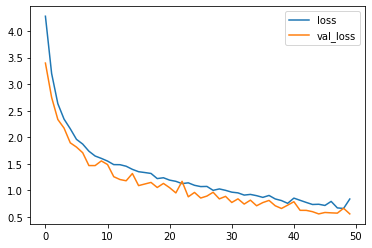

In [ ]:
plt.plot(hist_vgg.history['loss'])
plt.plot(hist_vgg.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')

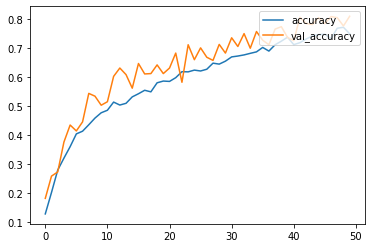

In [ ]:
plt.plot(hist_vgg.history['accuracy'])
plt.plot(hist_vgg.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')



*   Results of our training resnet:

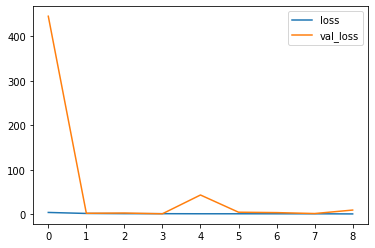

In [ ]:
plt.plot(hist_resnet.history['loss'])
plt.plot(hist_resnet.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')

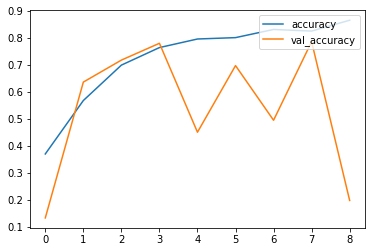

In [ ]:
plt.plot(hist_resnet.history['accuracy'])
plt.plot(hist_resnet.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

# **6. saving the model :**

In [5]:
#saving this in model directory
os.mkdir('model')
tf.keras.models.save_model(model_vgg, 'model')
tf.keras.models.save_model(model_resnet, 'model')